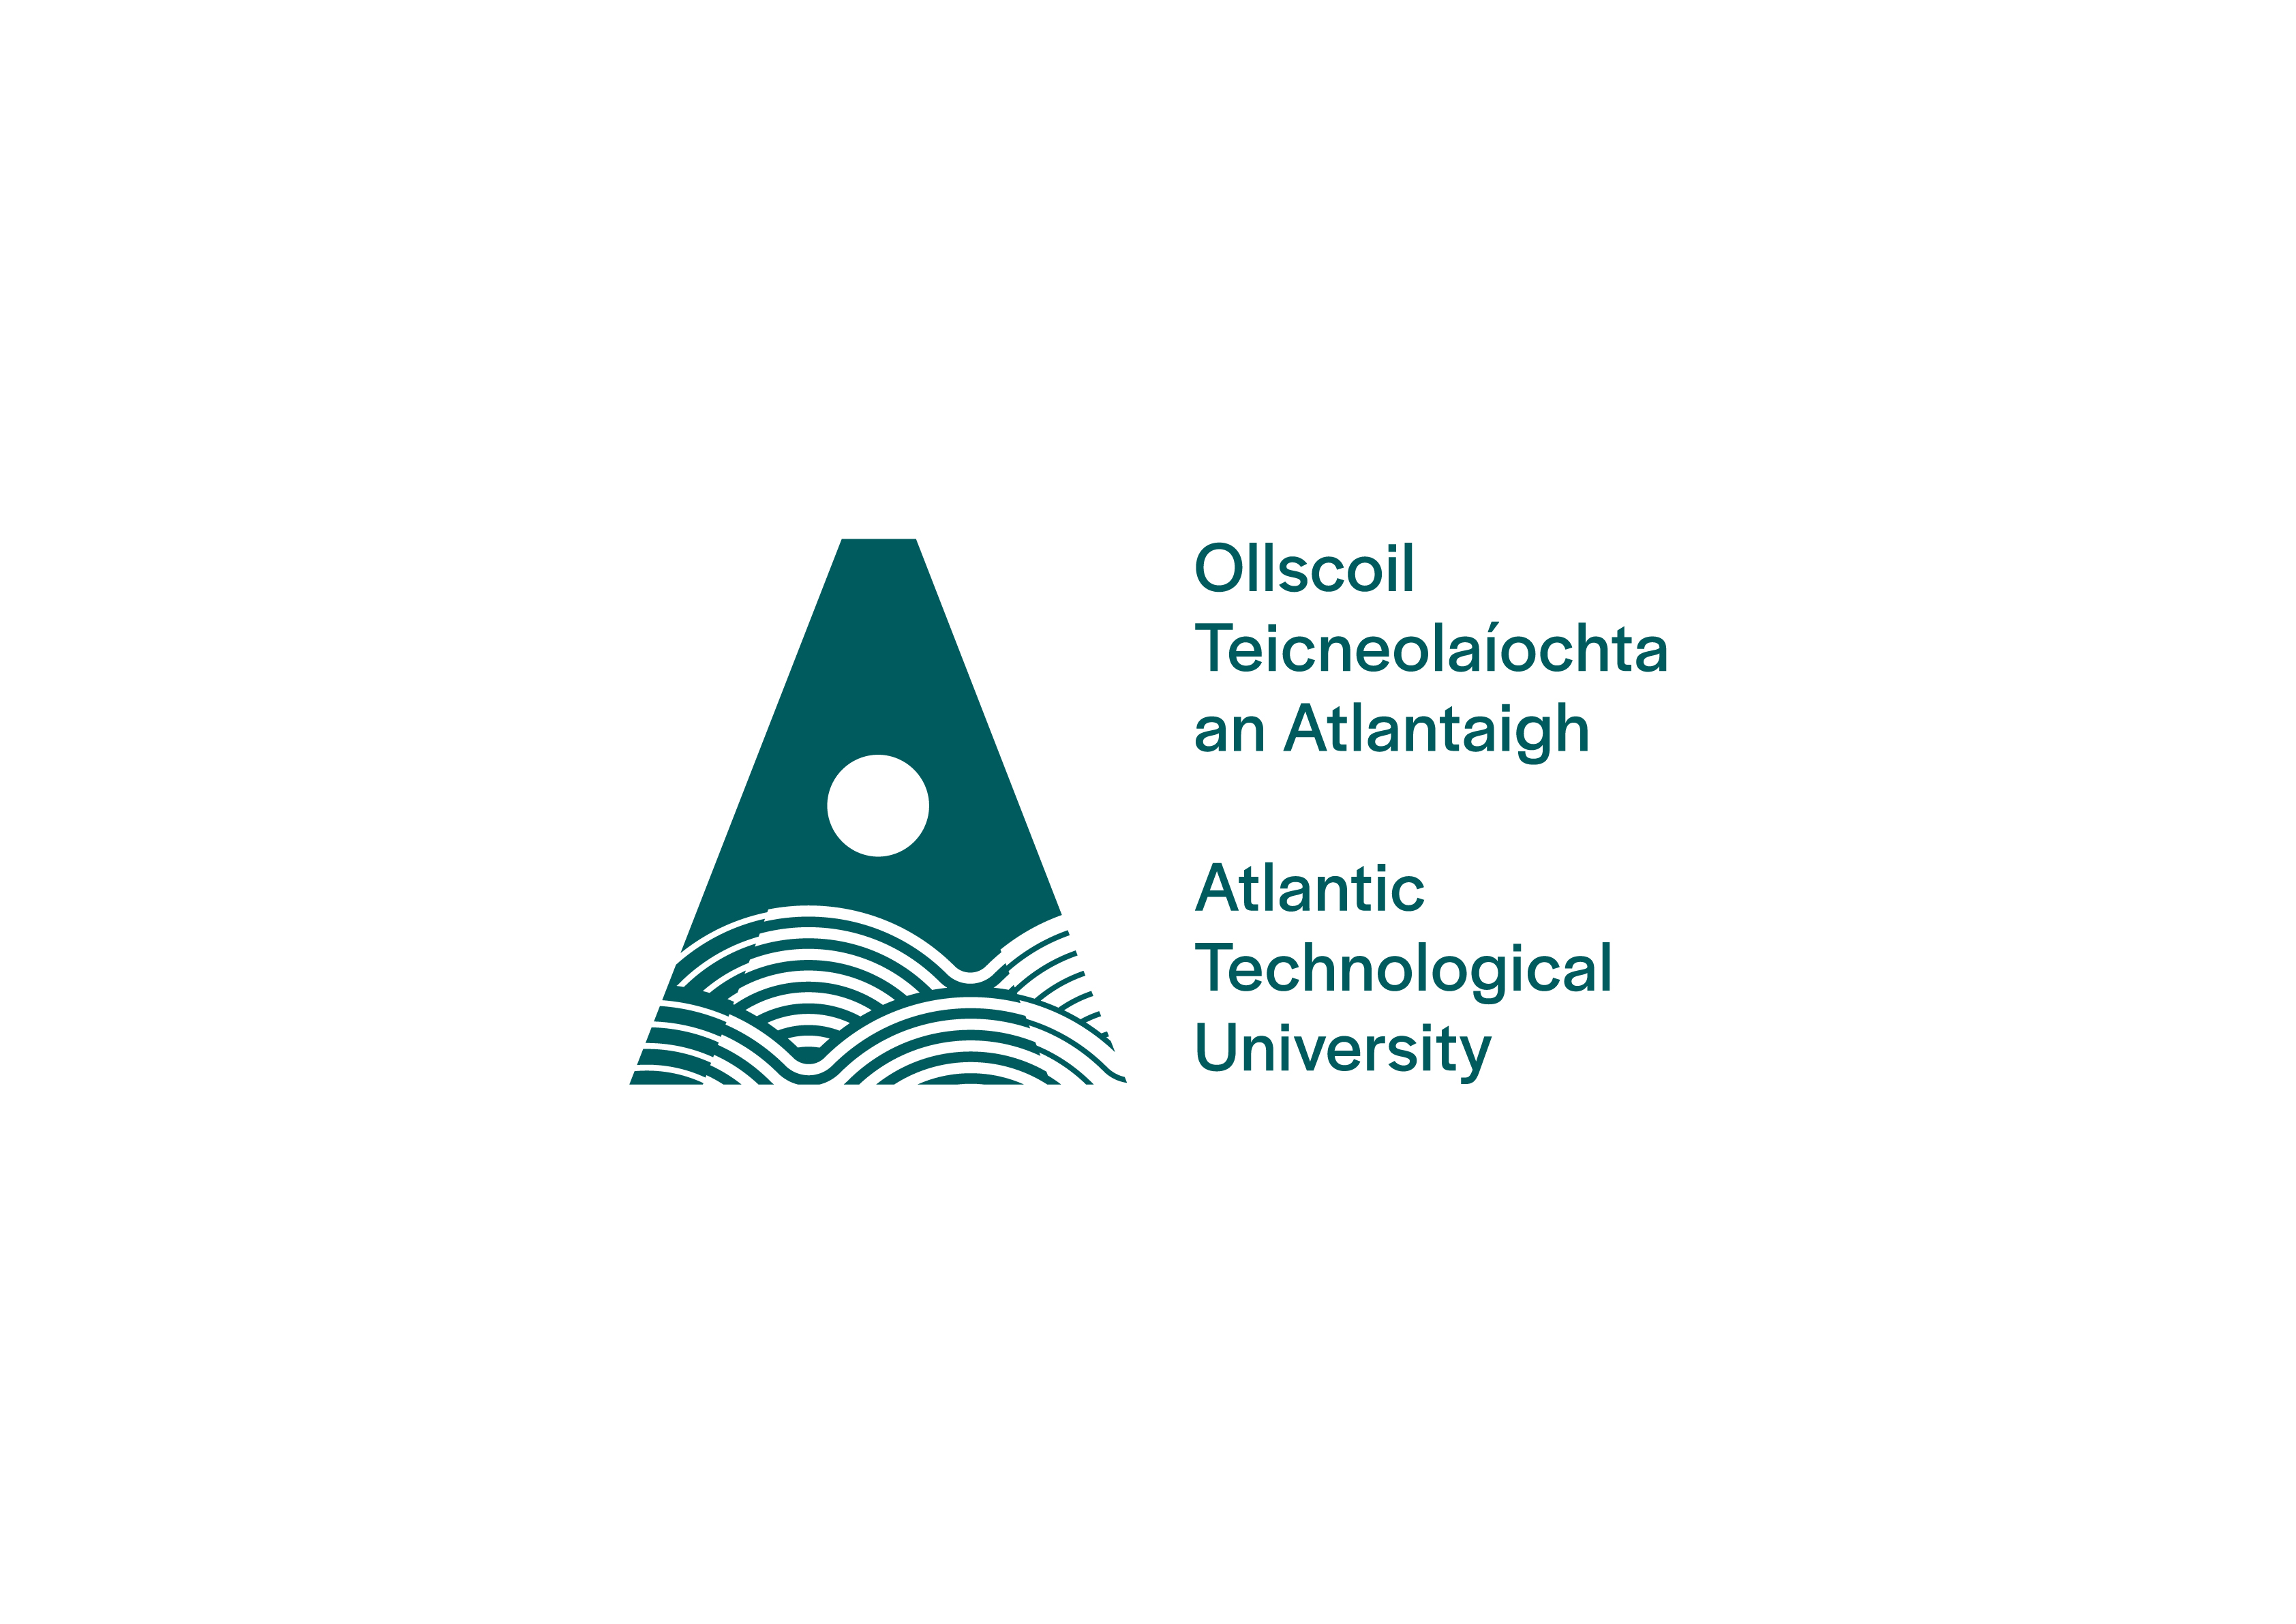

<h1 style="color: rgb(0, 133, 202);"> Normal Distribution</h1>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />



In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 14, 10

<h3 style="color: rgb(0, 133, 202);"> Probability Density Function</h3>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

$$
y = \dfrac{1}{\sigma \sqrt{2\pi}}e^{-\dfrac{(x-\mu)^{2}}{2\sigma^{2}}}
$$

The probability density function of the normal distribution, when evaluated at $x$, gives the probability that a random variable $X$ in the distribution is $x$. 

Text(0.5, 1.0, 'Comparison of PDF functions with different $\\mu$ and $\\sigma$ values')

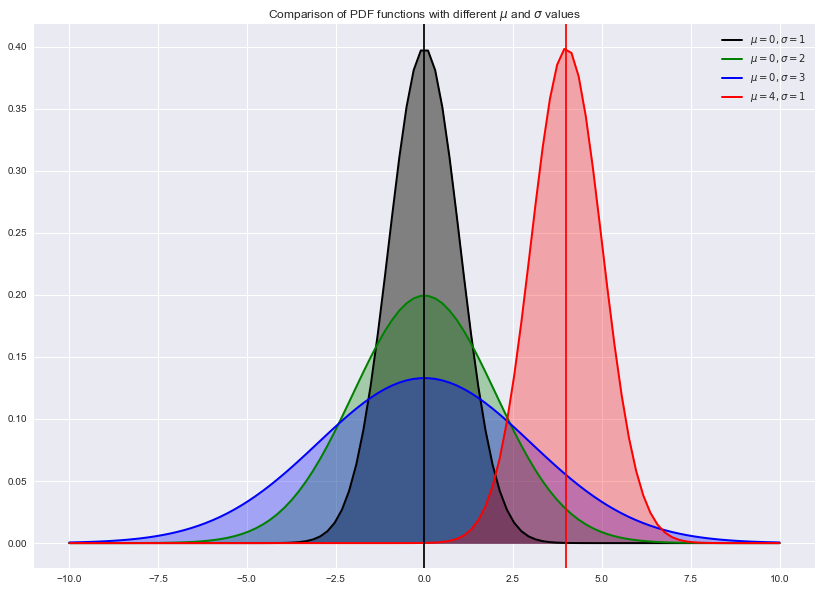

In [3]:
#creates the variables necessary to plot PDF using scipy stats
xmin, xmax = -10, 10
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, 0, 1)
q = ss.norm.pdf(x, 0, 2)
r = ss.norm.pdf(x, 0, 3)
s = ss.norm.pdf(x, 4, 1)
plt.plot(x, p, 'k', linewidth=2)
plt.plot(x, q, 'g', linewidth=2)
plt.plot(x, r, 'b', linewidth=2)
plt.plot(x, s, 'r', linewidth=2)


plt.fill_between(x, p, color = 'grey')
plt.fill_between(x, q, color = 'green', alpha=0.3)
plt.fill_between(x, r, color = 'blue', alpha=0.3)
plt.fill_between(x, s, color = 'red', alpha=0.3)
plt.axvline(0, color = 'k', linestyle = '-')
plt.axvline(4, color = 'r', linestyle = '-')
legend=(['$\mu = 0, \sigma = 1$', '$\mu = 0, \sigma = 2$', '$\mu = 0, \sigma = 3$', '$\mu = 4, \sigma = 1$'])
plt.legend(legend)
plt.title('Comparison of PDF functions with different $\mu$ and $\sigma$ values')

The PDF will show the general shape of distribution. The mean of the distribution dictates the location of the curve. This can be seen in the grey and red bell curves in the plot above. The curves are both the same shape but are located at different points on the x-axis. They have the same $\sigma$ value, 1, but different $\mu$ values, 0 vs 4. If we look at the grey, blue and green curves, we can see that they are all centred around the same point 0 as they have identical values for $\mu$. Theyare all different shapes however, as their $\sigma$ values are all different. They range from 1 for the grey curve to 3 for the blue curve. So the shape and spread of the curve are dictated by $\sigma$.

We can consider the standard normal distribution, which is the normal distribution when $\mu = 0$ and $\sigma = 1$. This is the grey curve shown above. As we have seen, the normal distribution is generally symmetrical and its PDF is exactly symmetrical. Values equal distances from the mean will have the same PDF value. For example, the PDF values of -1 and 1 in the standard normal distribution are both 0.242. The PDF value of 0 is .399 so we are likely so see almost twice as many 0s as 1s. It isn't entirely accurate to say that the probability of a particular value is given by the PDF. Since there are infinitely many values in the domain of the PDF (since it a continuous function) the actual probability for any one value is zero. The PDF is more accurately used to give the probability of seeing a value between two given values.

The PDF of 0 is 0.3989422804014327
The PDF of 1 is 0.24197072451914337
The PDF of -1 is 0.24197072451914337


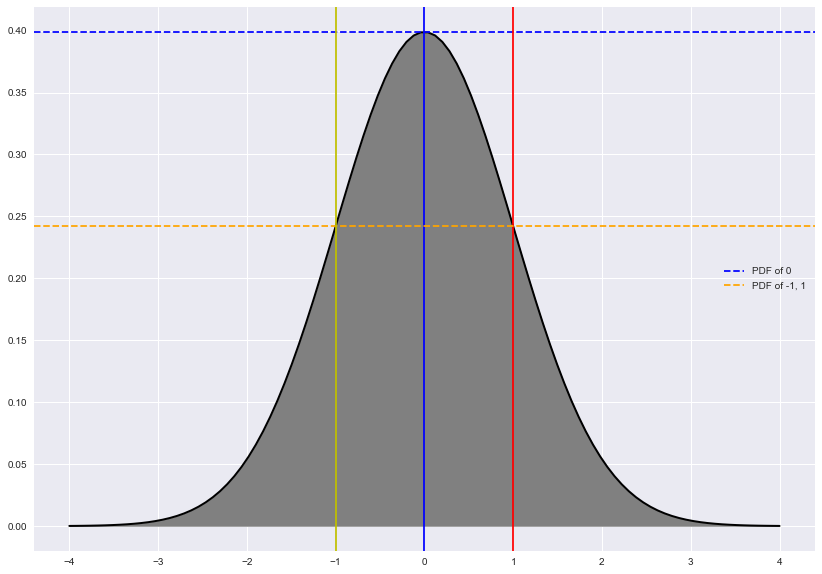

In [4]:
print("The PDF of 0 is {}".format(ss.norm().pdf(0)))
print("The PDF of 1 is {}".format(ss.norm().pdf(1)))
print("The PDF of -1 is {}".format(ss.norm().pdf(-1)))

#creates the variables necessary to plot the PDF
xmin, xmax = -4, 4
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)

plt.axhline(ss.norm.pdf(0), color = 'b', linestyle = '--', label = "PDF of 0")
plt.axvline(0, color = 'b', linestyle = '-')
plt.axvline(1, color = 'r', linestyle = '-')
plt.axhline(ss.norm.pdf(-1), color = 'orange', linestyle = '--', label = "PDF of -1, 1")
plt.axvline(-1, color = 'y', linestyle = '-')
plt.fill_between(x, p, color = 'grey')
plt.legend()

<h3 style="color: rgb(0, 133, 202);"> Generating a normally distributed dataset</h3>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

While the PDF is gives an outline of what the shape of the curve will be and is always perfectly symmetrical, in reality the distribution will show some variation. It will follow the approximate outline of the PDF curve but the noise inherent in the process will create some minor deviations. We can see this by generating a set of 10000 normally distributed random numbers using Numpy. The distribution has the $\mu = 0$ and $\sigma =1$ (the standard normal distribution). I have scaled the PDF to match the results of our experiment. We can see that the histogram is not completely symmetrical and this will always be the case in real world data.

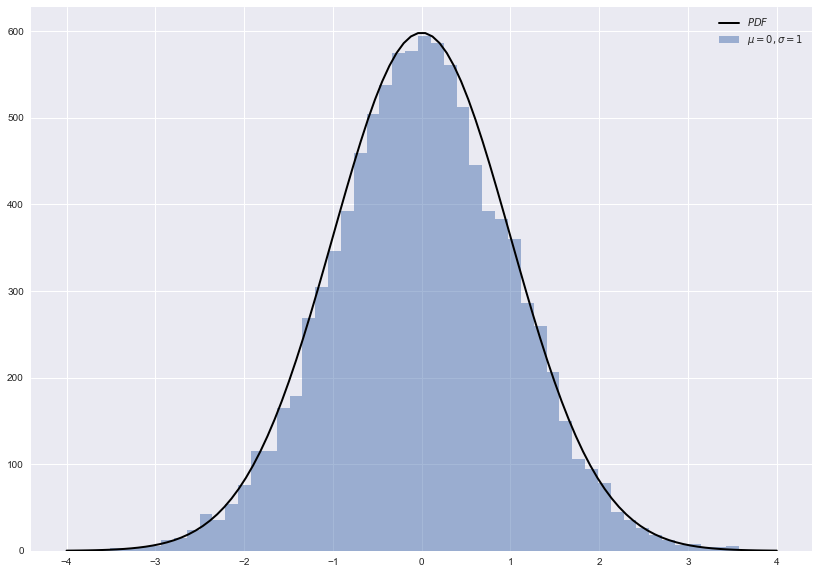

In [5]:
#sets up a random number generator
rng = np.random.default_rng()

#plots the PDF using scipy stats
xmin, xmax = -4, 4
x = np.linspace(xmin, xmax, 100)
p = ss.norm.pdf(x, 0, 1)*1500
plt.plot(x, p, 'k', linewidth=2)

#generates 10000 normally distributed random numbers and plots a histogram
legend=(['$PDF$', '$\mu = 0, \sigma = 1$'])
vals = rng.normal(0, 1, 10000)
plt.hist(vals, bins=50, alpha=0.5)
plt.legend(legend)

We can now visualise how different normal distributions of real world data compare to each other. Note in this plot the height represents the number of actual observations at that value, rather than the probability of that value occuring as was the case in the previous plots of the PDF.

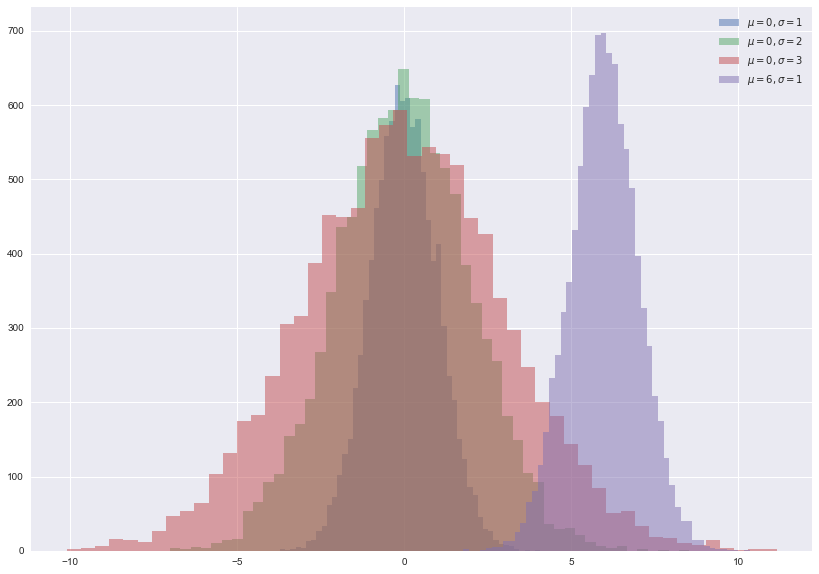

In [6]:
rng = np.random.default_rng()
legend=(['$\mu = 0, \sigma = 1$', '$\mu = 0, \sigma = 2$', '$\mu = 0, \sigma = 3$', '$\mu = 6, \sigma = 1$'])
values = rng.normal(0, 1, 10000)
values2 = rng.normal(0, 2, 10000)
values3 = rng.normal(0, 3, 10000)
values4 = rng.normal(6, 1, 10000)
plt.hist(values, bins=50, alpha=0.5)
plt.hist(values2, bins=50, alpha=0.5)
plt.hist(values3, bins=50, alpha=0.5)
plt.hist(values4, bins=50, alpha=0.5)
plt.legend(legend)

Central Limit Theorem and sample means

<h3 style="color: rgb(0, 133, 202);">Cumulative Distribution Function</h3>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

The cumulative distribution function of the normal distribution, when evaluated at $x$ gives the probability that a normally distributed continuous, real-valued variable $X$ will take a value less than or equal to $x$. The formula for the CDF of a normal distribution is given by<br />
<br />
$$
\\
F(x) = \Phi\Big(\dfrac{x - \mu}{\sigma}\Big) = \dfrac{1}{2}\Bigg[1 + \mathrm{erf}\Bigg(\dfrac{x - \mu}{\sigma\sqrt{2}}\Bigg)\Bigg]
\\
$$
<br />
We can calculated the CDF using the cdf method from scipy.stats package. For our array values above the CDF of 1 is 0.8413. That is the probability of a random variable $X$ in this distribution being less than or equal to $1$ is 0.8413. We can see this in the plot below. The probability that $X$ is less than or equal to $1$ is the area of the orange section.

The CDF of 1 for the our normal distribution is 0.8413.


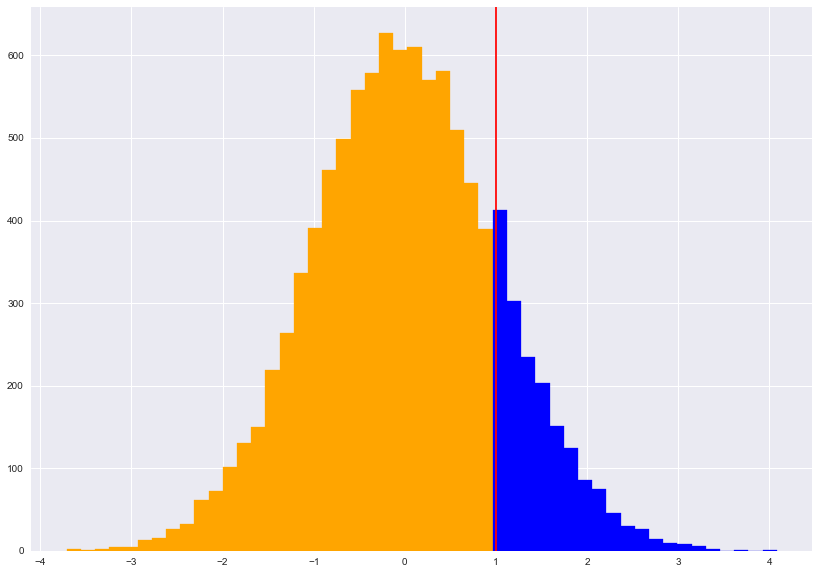

In [7]:
plt.hist(values, bins=50)
plt.axvline(1, color = 'r', linestyle = '-')
print("The CDF of 1 for the our normal distribution is {}.".format(round(ss.norm().cdf(1),4)))

for bar in plt.gca().containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x <= 1:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

One standard deviation either side of the mean covers 68.27% of the values in the normal distribution.


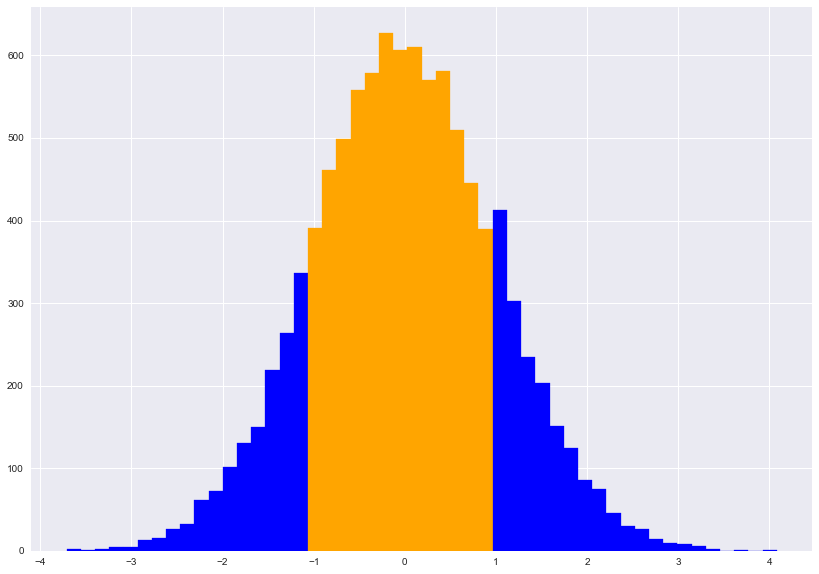

In [8]:
plt.hist(values, bins=50)
oneSigma = ss.norm().cdf(1) - ss.norm().cdf(-1)
print("One standard deviation either side of the mean covers {}% of the values in the normal distribution.".format(round(100*oneSigma,2)))

for bar in plt.gca().containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x <= 1 and x >= -1:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

Two standard deviations either side of the mean cover 95.45% of the values in the normal distribution.


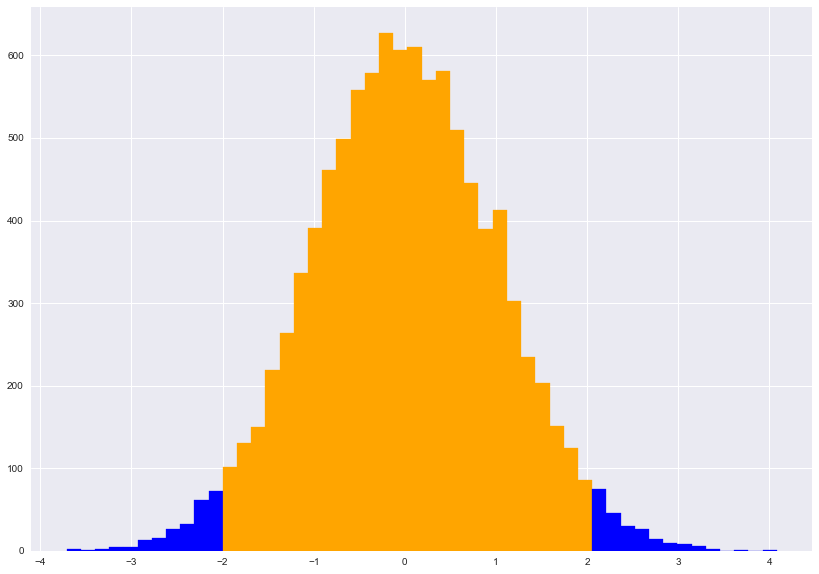

In [9]:
plt.hist(values, bins=50)
twoSigma = ss.norm().cdf(2) - ss.norm().cdf(-2)
print("Two standard deviations either side of the mean cover {}% of the values in the normal distribution.".format(round(100*twoSigma,2)))

for bar in plt.gca().containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x <= 2 and x >= -2:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

Three standard deviations either side of the mean cover 99.73% of the values in the normal distribution.


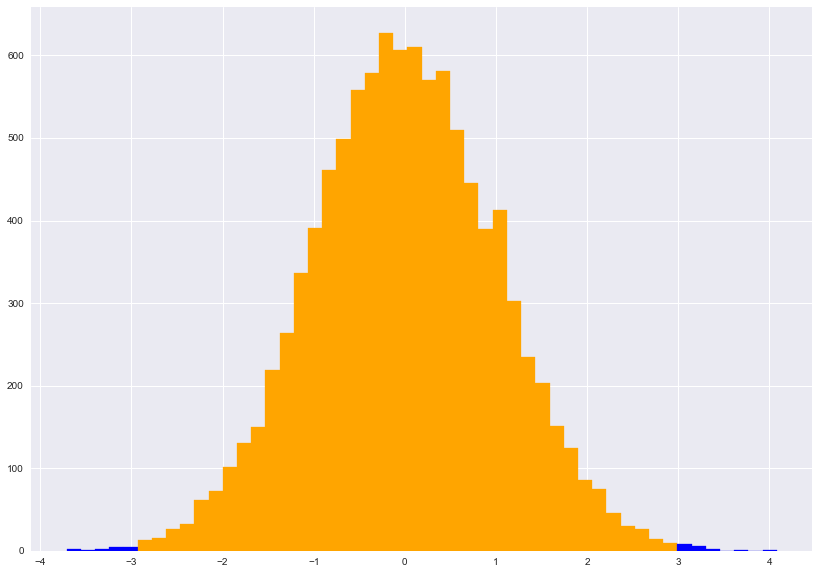

In [10]:
#https://stackoverflow.com/questions/70202374/how-to-change-histogram-color-based-on-x-axis-in-matplotlib

plt.hist(values, bins=50)
threeSigma = ss.norm().cdf(3) - ss.norm().cdf(-3)
print("Three standard deviations either side of the mean cover {}% of the values in the normal distribution.".format(round(100*threeSigma,2)))

for bar in plt.gca().containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x <= 3 and x >= -3:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

<h3 style="color: rgb(0, 133, 202);">Industry applications of the normal distribution</h3>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

A major application of the normal distribution in industry is the control of manufacturing processes. Many processes, such as the high volume manufacture of nuts and bolts, present as normally distributed values. The normal distribution can be used to define limits for these processes to determine if a process is stable or if a particular, abnormal issue (known as a special cause) is causing a problem with the process. This discipline is called Statistical Process Control and is based around the use of the cumulative distribution function. We have already seen that 99.7% of values of a normal distribution are found within 3 standard deviations of the mean. We can use this to define how stable or capable a process is.

In [11]:
ss.norm().cdf(3) - ss.norm().cdf(-3)

0.9973002039367398

<h3 style="color: rgb(0, 133, 202);"> Capability</h3>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

If we had built a machine for cutting steel bars into 1 metre lengths, how would we know if it is reliable and accurate? We understand there is always going to be a certain amount of variation so we need a way of defining how much variation is too much. Our specification for the length of the bars is 1000mm +/- 10mm. This means our lower spec limit will  be 990mm and our upper spec limit is 1010mm. We run a few trials on the machine and get the following measurements.

In [12]:
trials = rng.normal(1000, 3, 100)
trials

array([1003.31258098, 1004.79149079,  995.96718078,  997.19539286,
       1000.94158485, 1002.0435666 ,  998.88515902, 1007.80157506,
        999.60149967, 1001.21823265, 1003.58973639,  999.67441689,
       1001.9310386 , 1003.13408263,  995.27733826,  995.74451768,
       1003.2130607 , 1002.93840358,  998.75840543,  999.4305072 ,
        996.40417812, 1001.22832937, 1000.82648215, 1000.453147  ,
        997.77222368, 1000.97747464, 1001.64906573,  998.92474176,
        996.43041072, 1006.31610622,  998.16445638,  999.90159597,
        998.39509932,  998.13504931, 1000.68731766, 1000.6734849 ,
       1000.54349864, 1009.36385566,  998.96458422, 1006.06618355,
        997.48088885, 1001.44094566, 1002.77644336,  999.89251754,
        997.64066776,  997.42606547, 1004.12014015,  999.03539008,
        998.62141739,  999.64301463,  999.44700955, 1004.65801216,
       1005.76068654, 1000.89667837,  998.97638233,  995.45154805,
        997.04613612, 1001.87997702,  995.92087139, 1001.28784

Now we know that 99.7% of the values of this distribution will appear within 3 standard deviations of the mean so we can work out if our machine is reliable enough to keep all our bars in spec. By calculating the value of $6\sigma$ we can determine if the spread of the distribution is greater or smaller than the tolerance of the specification. We can calculate an index value known as Cp that shows the ratio between the tolerance of the specification and the spread of our data.

Formula for $Cp$:

$$
Cp = \dfrac{\text{Upper Spec Limit - Lower Spec Limit}}{6\sigma}
$$

A Cp value of 1 or greater means that the spread of data ($6\sigma$) is less than or equal to our specification and our machine is reliable enough to keep all finished bars in spec, if the mean of the length of the bars is kept close to the middle of the specification. We will now check the example above and calculate its Cp value.

In [13]:
specTolerance = 20 #upper spec (1010) - lower spec (990)
cp = specTolerance / (6*trials.std())
print('Cp = {}'.format(round(cp,2)))

Cp = 1.11


We can now plot the results of our trials.

Text(0.5, 1.0, 'Capability - Cp')

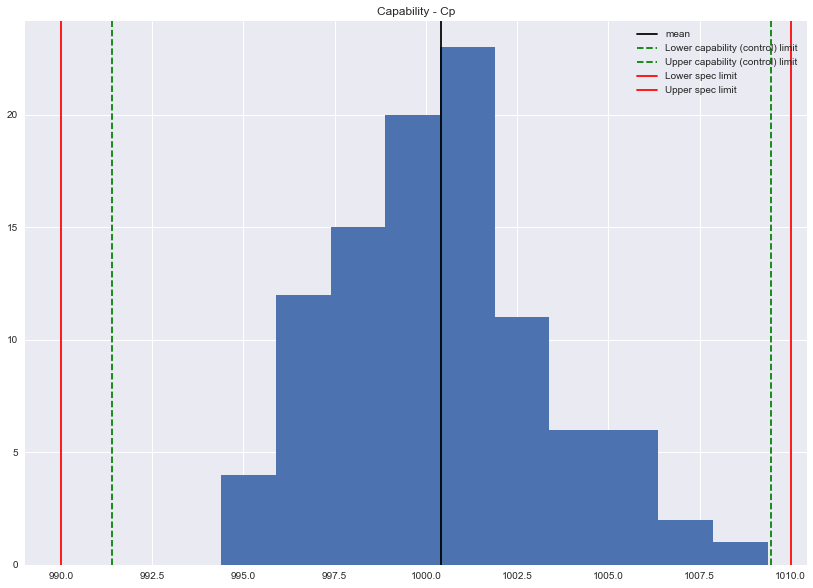

In [14]:
plt.hist(trials)
plt.axvline(trials.mean(), color = 'k', label = 'mean')
plt.axvline(trials.mean() - 3*trials.std(), color = 'g', linestyle = '--', label='Lower capability (control) limit')
plt.axvline(trials.mean() + 3*trials.std(), color = 'g', linestyle = '--', label='Upper capability (control) limit')
plt.axvline(990, color = 'r', label = 'Lower spec limit')
plt.axvline(1010, color = 'r', label = 'Upper spec limit')
plt.legend()
plt.title('Capability - Cp')

We can see that the spread of our data (the dashed green lines) is within our specification limits (solid red lines) so the variation in our machine is small enough to not go outside our spec limits. However, even if our Cp value is above 1, if the mean of the measurements is not close to the centre of the tolerance, some of our bars could end up the wrong size. 

Text(0.5, 1.0, 'Capability - Cp')

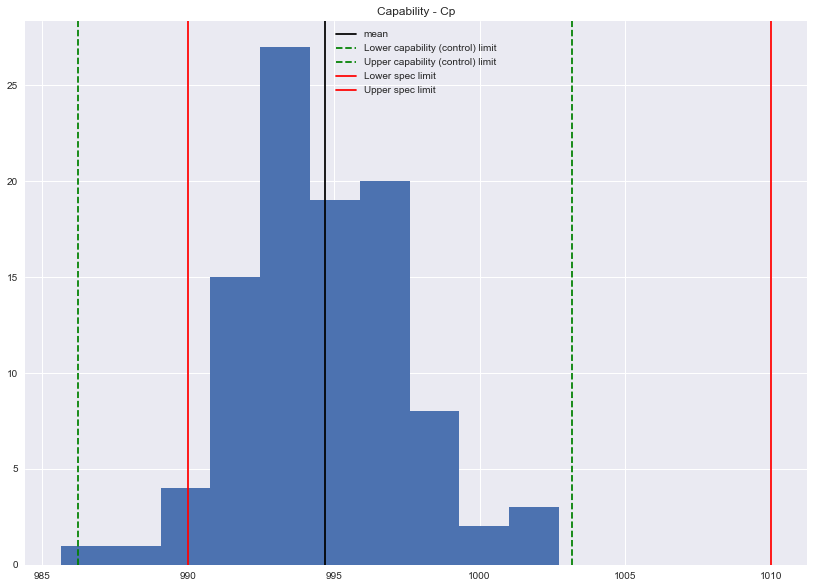

In [15]:
trials2 = rng.normal(995, 3, 100)
plt.hist(trials2)
plt.axvline(trials2.mean(), color = 'k', label = 'mean')
plt.axvline(trials2.mean() - 3*trials2.std(), color = 'g', linestyle = '--', label='Lower capability (control) limit')
plt.axvline(trials2.mean() + 3*trials2.std(), color = 'g', linestyle = '--', label='Upper capability (control) limit')
plt.axvline(990, color = 'r', label = 'Lower spec limit')
plt.axvline(1010, color = 'r', label = 'Upper spec limit')
plt.legend()
plt.title('Capability - Cp')

Even though the Cp value has remained the same, because the mean is 5mm lower than our previous example, we will have bars that are below the lower spec limit of 990mm. While Cp is useful in determining if a machine or process is capable of holding a specific tolerance, it gives the best case scenario. Often we are interested in the worst case scenario. This is evaluated using a related index called Cpk. Cpk takes the location of the mean into consideration and looks at the capability on the side where the mean is closest to the spec limit. The formula for Cpk is

$$
\large Cpk=min \left (\frac{USL-mean}{3\sigma},\frac{mean-LSL}{3\sigma} \right)
$$

We can now check our first set of trials using the Cpk formula.

In [18]:
lsl = 990
usl = 1010
mean = trials.mean()
sigma = trials.std()

cpk = min((usl - mean)/(3*sigma), (mean - lsl)/(3*sigma))
print('For the first set of trials Cp was {} and Cpk was {}'.format(round(cp,2), round(cpk,2)))

For the first set of trials Cp was 1.11 and Cpk was 1.06


Cp and Cpk are relatively close here as the mean of the trials was close to the centre of the tolerance. In fact Cp is the maximum value Cpk can achieve and will happen when the mean of the trials exactly matches the centre of the tolerance. We will now look at our second trials.

In [19]:
lsl = 990
usl = 1010
mean = trials2.mean()
sigma = trials2.std()

cpk = min((usl - mean)/(3*sigma), (mean - lsl)/(3*sigma))
print('For the first set of trials Cp was {} and Cpk was {}'.format(round(cp,2), round(cpk,2)))

For the first set of trials Cp was 1.11 and Cpk was 0.55


So even though we have the same Cp as the first trials, because our mean was quite far from the centre of the tolerance, we have a significant change in Cpk. In fact, if Cpk is less than 1 it means we will have less than 99.7% of parts in spec.

<h2 style="color: rgb(0, 133, 202);">References</h2>

<hr style="border-top: 1px solid rgb(0, 0, 0);" />

https://en.wikipedia.org/wiki/Normal_distribution <br />
https://www.six-sigma-material.com/Normal-Distribution.html <br />
https://mathworld.wolfram.com/CentralLimitTheorem.html  <br />
https://www.toppr.com/guides/maths-formulas/cpk-formulas